# Preprocessing

In [1]:
#Import Library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
#Import dataset

datapath = '../../../1. Data/Raw/Data Historis ANTM.csv'
dataset = pd.read_csv(datapath)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,01/03/2024,1480,1465,1490,1465,"27,75M","1,37%"
1,29/02/2024,1460,1495,1505,1460,"48,51M","-2,01%"
2,28/02/2024,1490,1490,1500,1470,"23,37M","0,68%"
3,27/02/2024,1480,1515,1515,1470,"45,78M","-2,31%"
4,26/02/2024,1515,1555,1565,1510,"28,49M","-2,26%"
...,...,...,...,...,...,...,...
2426,07/03/2014,949,949,974,937,"104,62M","0,00%"
2427,06/03/2014,949,907,953,903,"163,35M","4,63%"
2428,05/03/2014,907,890,911,874,"161,97M","3,78%"
2429,04/03/2014,874,865,890,865,"49,19M","0,00%"


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2431 non-null   object
 1   Terakhir    2431 non-null   int64 
 2   Pembukaan   2431 non-null   int64 
 3   Tertinggi   2431 non-null   int64 
 4   Terendah    2431 non-null   int64 
 5   Vol         2431 non-null   object
 6   Perubahan%  2431 non-null   object
dtypes: int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
dataset.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,2431.000000,2431.000000,2431.000000,2431.000000
mean,1201.218840,1204.206499,1225.565611,1182.775401
std,683.413069,684.568940,697.596564,671.000697
min,287.000000,290.000000,294.000000,285.000000
25%,720.000000,720.000000,735.000000,710.000000
50%,882.000000,885.000000,899.000000,870.000000
75%,1870.000000,1865.000000,1905.000000,1835.000000
max,3190.000000,3300.000000,3440.000000,3060.000000


In [5]:
dataset.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Tanggal,0
Terakhir,0
Pembukaan,0
Tertinggi,0
Terendah,0
Vol,0
Perubahan%,0


In [6]:
from datetime import datetime
dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'],
                                   format = '%d/%m/%Y')
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-03-01,1480,1465,1490,1465,"27,75M","1,37%"
1,2024-02-29,1460,1495,1505,1460,"48,51M","-2,01%"
2,2024-02-28,1490,1490,1500,1470,"23,37M","0,68%"
3,2024-02-27,1480,1515,1515,1470,"45,78M","-2,31%"
4,2024-02-26,1515,1555,1565,1510,"28,49M","-2,26%"
...,...,...,...,...,...,...,...
2426,2014-03-07,949,949,974,937,"104,62M","0,00%"
2427,2014-03-06,949,907,953,903,"163,35M","4,63%"
2428,2014-03-05,907,890,911,874,"161,97M","3,78%"
2429,2014-03-04,874,865,890,865,"49,19M","0,00%"


In [7]:
dataset = dataset.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,874,874,882,861,"19,98M","0,00%"
1,2014-03-04,874,865,890,865,"49,19M","0,00%"
2,2014-03-05,907,890,911,874,"161,97M","3,78%"
3,2014-03-06,949,907,953,903,"163,35M","4,63%"
4,2014-03-07,949,949,974,937,"104,62M","0,00%"
...,...,...,...,...,...,...,...
2426,2024-02-26,1515,1555,1565,1510,"28,49M","-2,26%"
2427,2024-02-27,1480,1515,1515,1470,"45,78M","-2,31%"
2428,2024-02-28,1490,1490,1500,1470,"23,37M","0,68%"
2429,2024-02-29,1460,1495,1505,1460,"48,51M","-2,01%"


In [8]:
dataset_B = dataset[dataset['Vol'].str.contains('B')]
print(dataset_B)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah    Vol Perubahan%
1608 2020-10-14       955        775        955       775  1,12B     24,84%
1609 2020-10-15       935       1020       1180       920  1,51B     -2,09%
1611 2020-10-19      1055        970       1055       950  1,16B     12,23%
1613 2020-10-21      1100       1050       1145      1050  1,37B      6,28%
1649 2020-12-16      1815       1595       1925      1590  1,27B     16,35%
1651 2020-12-18      1950       1845       1960      1810  1,08B      7,44%
1658 2021-01-04      2190       1970       2200      1940  1,04B     13,18%
1659 2021-01-05      2230       2190       2340      2130  1,14B      1,83%
1661 2021-01-07      2600       2250       2740      2240  1,98B     17,12%
1662 2021-01-08      2600       2640       2750      2560  1,05B      0,00%
1664 2021-01-12      2770       2580       2780      2550  1,15B      7,36%
1665 2021-01-13      3120       2850       3130      2850  1,28B     12,64%
1666 2021-01

In [9]:
dataset_M = dataset[dataset['Vol'].str.contains('M')]
print(dataset_M)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah      Vol Perubahan%
0    2014-03-03       874        874        882       861   19,98M      0,00%
1    2014-03-04       874        865        890       865   49,19M      0,00%
2    2014-03-05       907        890        911       874  161,97M      3,78%
3    2014-03-06       949        907        953       903  163,35M      4,63%
4    2014-03-07       949        949        974       937  104,62M      0,00%
...         ...       ...        ...        ...       ...      ...        ...
2426 2024-02-26      1515       1555       1565      1510   28,49M     -2,26%
2427 2024-02-27      1480       1515       1515      1470   45,78M     -2,31%
2428 2024-02-28      1490       1490       1500      1470   23,37M      0,68%
2429 2024-02-29      1460       1495       1505      1460   48,51M     -2,01%
2430 2024-03-01      1480       1465       1490      1465   27,75M      1,37%

[2409 rows x 7 columns]


In [10]:
dataset_K = dataset[dataset['Vol'].str.contains('K')]
print(dataset_K)

Empty DataFrame
Columns: [Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol, Perubahan%]
Index: []


In [11]:
dataset = dataset.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,874,874,882,861,19.98M,0.00%
1,2014-03-04,874,865,890,865,49.19M,0.00%
2,2014-03-05,907,890,911,874,161.97M,3.78%
3,2014-03-06,949,907,953,903,163.35M,4.63%
4,2014-03-07,949,949,974,937,104.62M,0.00%
...,...,...,...,...,...,...,...
2426,2024-02-26,1515,1555,1565,1510,28.49M,-2.26%
2427,2024-02-27,1480,1515,1515,1470,45.78M,-2.31%
2428,2024-02-28,1490,1490,1500,1470,23.37M,0.68%
2429,2024-02-29,1460,1495,1505,1460,48.51M,-2.01%


In [12]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset['Vol'] = dataset['Vol'].apply(replace_value)

dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,874,874,882,861,19980000.0,0.00%
1,2014-03-04,874,865,890,865,49190000.0,0.00%
2,2014-03-05,907,890,911,874,161970000.0,3.78%
3,2014-03-06,949,907,953,903,163350000.0,4.63%
4,2014-03-07,949,949,974,937,104620000.0,0.00%
...,...,...,...,...,...,...,...
2426,2024-02-26,1515,1555,1565,1510,28490000.0,-2.26%
2427,2024-02-27,1480,1515,1515,1470,45780000.0,-2.31%
2428,2024-02-28,1490,1490,1500,1470,23370000.0,0.68%
2429,2024-02-29,1460,1495,1505,1460,48510000.0,-2.01%


In [13]:
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir               int64
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [14]:
dataset = dataset.astype({'Terakhir': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [15]:
dataset = dataset.astype({'Vol': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2431 non-null   datetime64[ns]
 1   Terakhir    2431 non-null   float32       
 2   Pembukaan   2431 non-null   int64         
 3   Tertinggi   2431 non-null   int64         
 4   Terendah    2431 non-null   int64         
 5   Vol         2431 non-null   float32       
 6   Perubahan%  2431 non-null   object        
dtypes: datetime64[ns](1), float32(2), int64(3), object(1)
memory usage: 114.1+ KB


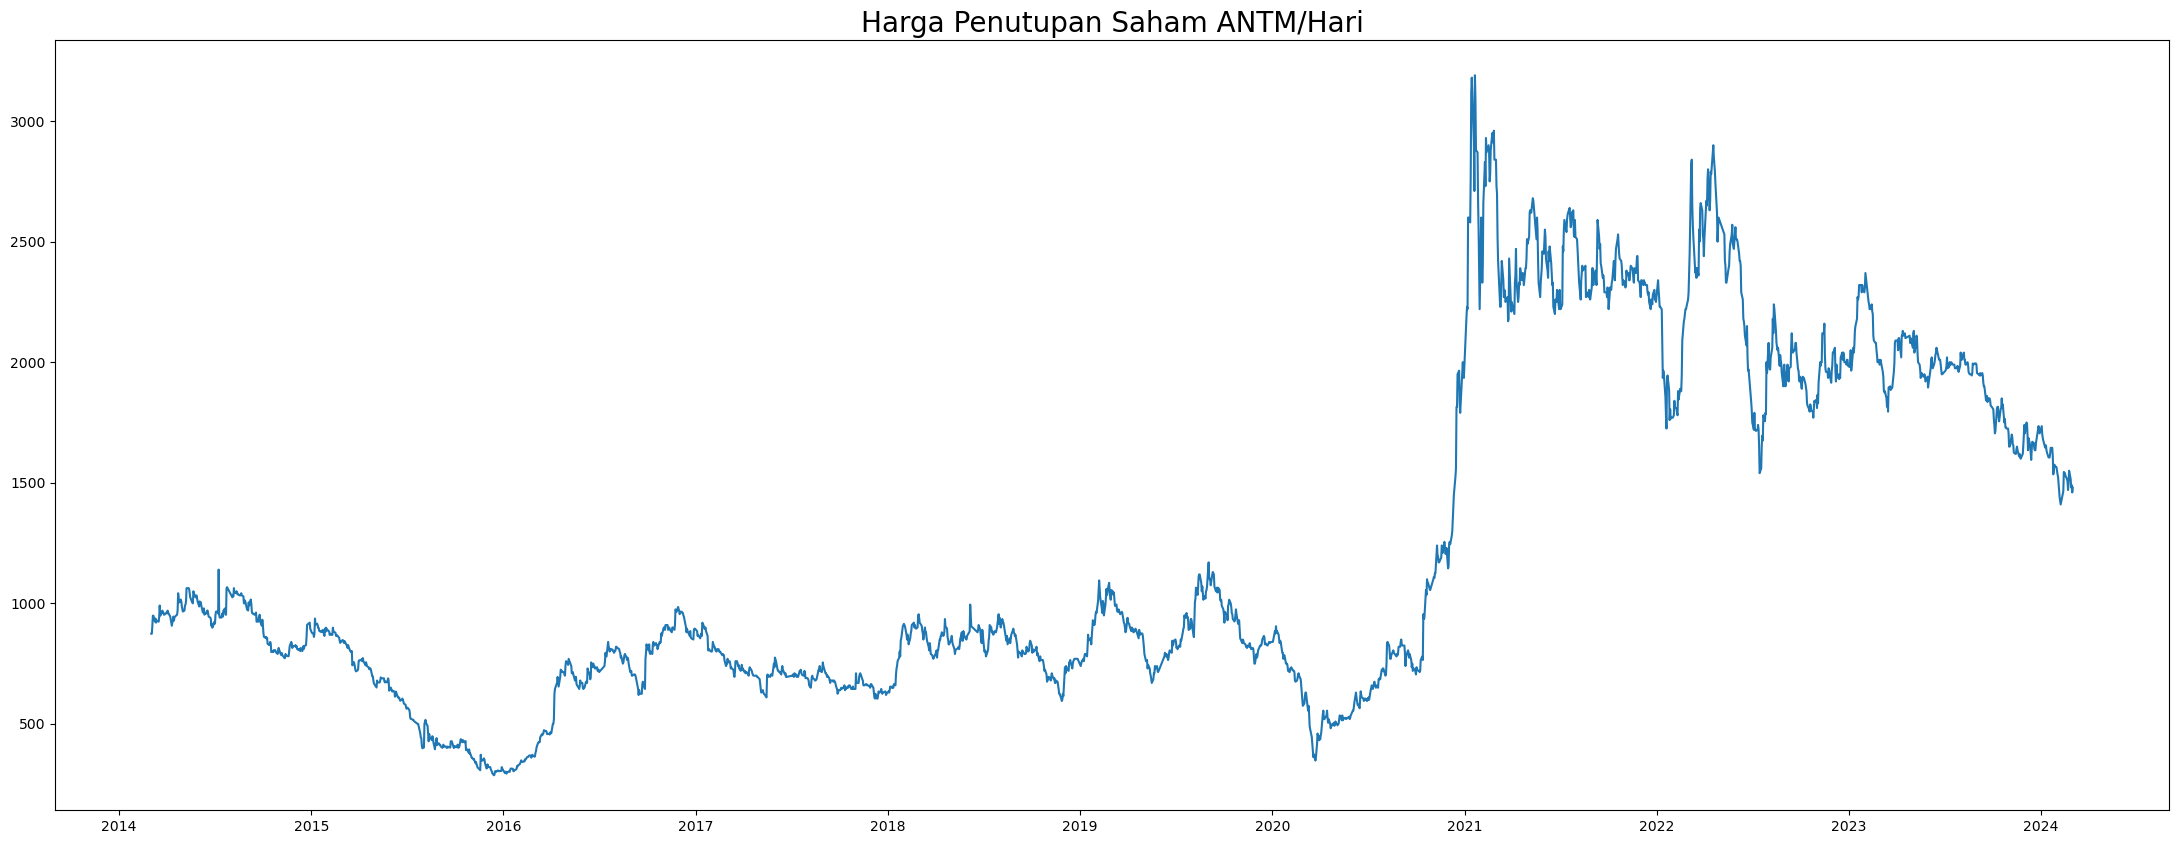

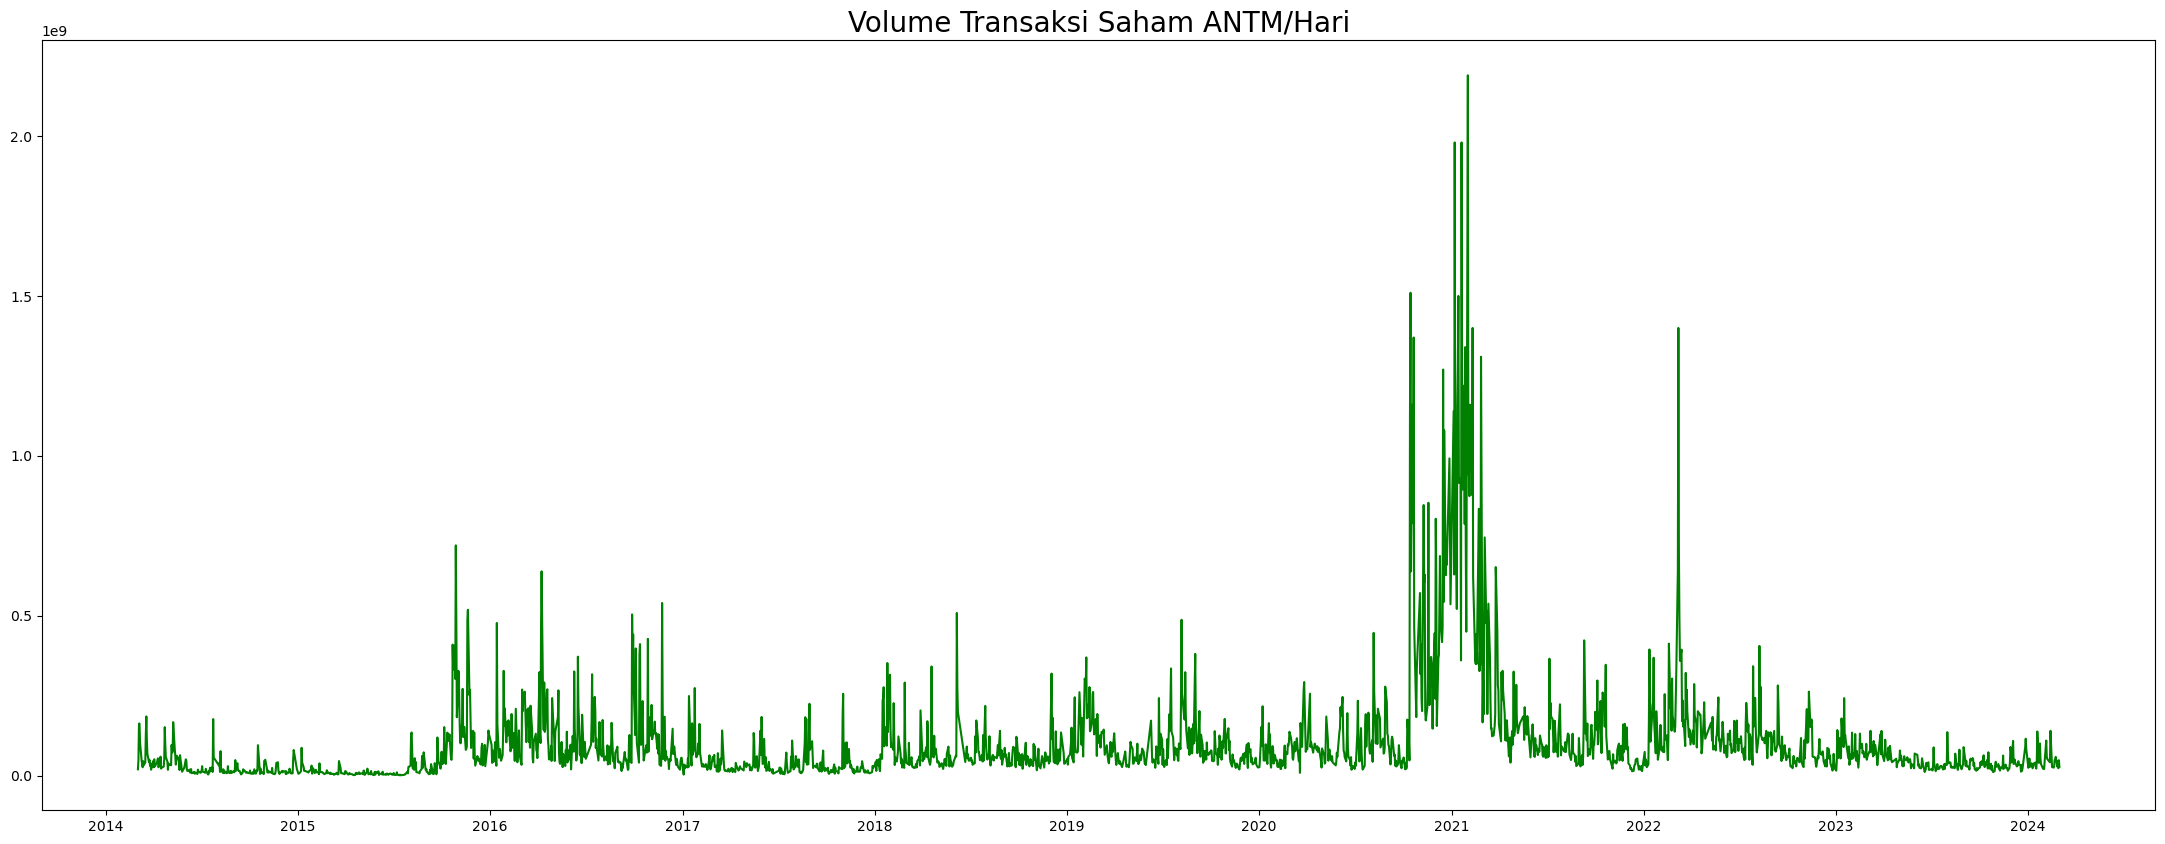

In [17]:
plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Terakhir'])
plt.title('Harga Penutupan Saham ANTM/Hari', fontsize = 20)

plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Vol'], 'g')
plt.title('Volume Transaksi Saham ANTM/Hari', fontsize = 20)

plt.show()

In [18]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu")
print(f"Using {device} device")

Using cuda device


In [19]:
data_use = np.column_stack((dataset['Terakhir'], dataset['Vol']))
tanggal_data = pd.DataFrame({'Tanggal' : dataset['Tanggal']})

print(data_use)
print(tanggal_data)

[[8.7400e+02 1.9980e+07]
 [8.7400e+02 4.9190e+07]
 [9.0700e+02 1.6197e+08]
 ...
 [1.4900e+03 2.3370e+07]
 [1.4600e+03 4.8510e+07]
 [1.4800e+03 2.7750e+07]]
        Tanggal
0    2014-03-03
1    2014-03-04
2    2014-03-05
3    2014-03-06
4    2014-03-07
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[2431 rows x 1 columns]


In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_use)

In [21]:
seq_length = 1

x_train = []
y_train = []

seq_length = 10
for i in range (len(scaled_data) - seq_length):
    x_train.append(scaled_data[i:i + seq_length])
    y_train.append(scaled_data[i + seq_length, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1, 1)

In [22]:
print(x_train)
print(y_train)

[[[0.20220461 0.00850304]
  [0.20220461 0.02184928]
  [0.21357217 0.07337923]
  ...
  [0.2180503  0.01143638]
  [0.22080606 0.02010847]
  [0.22080606 0.01430575]]

 [[0.20220461 0.02184928]
  [0.21357217 0.07337923]
  [0.22803998 0.07400977]
  ...
  [0.22080606 0.02010847]
  [0.22080606 0.01430575]
  [0.21942818 0.01850929]]

 [[0.21357217 0.07337923]
  [0.22803998 0.07400977]
  [0.22803998 0.04717563]
  ...
  [0.22080606 0.01430575]
  [0.21942818 0.01850929]
  [0.2266621  0.05834243]]

 ...

 [[0.43334484 0.06354661]
  [0.4316225  0.02790787]
  [0.42817777 0.01176992]
  ...
  [0.43506718 0.02631326]
  [0.4230107  0.01239131]
  [0.41095418 0.02029123]]

 [[0.4316225  0.02790787]
  [0.42817777 0.01176992]
  [0.4230107  0.01091093]
  ...
  [0.4230107  0.01239131]
  [0.41095418 0.02029123]
  [0.4143989  0.01005195]]

 [[0.42817777 0.01176992]
  [0.4230107  0.01091093]
  [0.41956598 0.0129396 ]
  ...
  [0.41095418 0.02029123]
  [0.4143989  0.01005195]
  [0.40406477 0.02153859]]]
[[0.219428

In [23]:
train_size = int(len(x_train) * 0.9)
x_train, x_test = x_train[:train_size], x_train[train_size:]
y_train, y_test = y_train[:train_size], y_train[train_size:]
tanggal_train, tanggal_test = tanggal_data[seq_length:train_size+seq_length],tanggal_data[train_size+seq_length:]

print(x_train.shape)
print(y_train.shape)
print(tanggal_train.shape)
print(y_test.shape)
print(tanggal_test.shape)

print(tanggal_test)

(2178, 10, 2)
(2178, 1)
(2178, 1)
(243, 1)
(243, 1)
        Tanggal
2188 2023-02-23
2189 2023-02-24
2190 2023-02-27
2191 2023-02-28
2192 2023-03-01
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[243 rows x 1 columns]


In [24]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [25]:
# Memastikan bentuk data benar
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)

# Menampilkan contoh data dari x_train_tensor dan y_train_tensor
print("\nContoh data dari x_train_tensor:")
print(x_train_tensor[0])  # Menampilkan sampel pertama dari x_train_tensor

print("\nContoh data dari y_train_tensor:")
print(y_train_tensor[0])  # Menampilkan target pertama dari y_train_tensor

x_train_tensor shape: torch.Size([2178, 10, 2])
y_train_tensor shape: torch.Size([2178, 1])
x_test_tensor shape: torch.Size([243, 10, 2])
y_test_tensor shape: torch.Size([243, 1])

Contoh data dari x_train_tensor:
tensor([[0.2022, 0.0085],
        [0.2022, 0.0218],
        [0.2136, 0.0734],
        [0.2280, 0.0740],
        [0.2280, 0.0472],
        [0.2194, 0.0213],
        [0.2239, 0.0157],
        [0.2181, 0.0114],
        [0.2208, 0.0201],
        [0.2208, 0.0143]])

Contoh data dari y_train_tensor:
tensor([0.2194])


In [26]:
class StockPricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockPricePredictor, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.gru1 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.gru2 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        h0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm1(x, (h0_lstm1, c0_lstm1))
        
        h0_gru1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru1(out, h0_gru1)
        
        h0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm2(out, (h0_lstm2, c0_lstm2))
        
        h0_gru2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru2(out, h0_gru2)
        
        out = self.fc(out[:, -1, :])
        return out

In [27]:
# Membuat TensorDataset dan DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [28]:
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)


x_train_tensor shape: torch.Size([2178, 10, 2])
y_train_tensor shape: torch.Size([2178, 1])
x_test_tensor shape: torch.Size([243, 10, 2])
y_test_tensor shape: torch.Size([243, 1])


In [29]:
input_size = x_train_tensor.shape[2]  # number of features, in this case 2
hidden_size = 64
num_layers = 1
num_epochs = 30
learning_rate = 0.001

# Initialize model, loss function, optimizer
model = StockPricePredictor(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # Average training loss for this epoch
    train_losses.append(epoch_train_loss / len(train_loader))
    
    # Validation loss
    model.eval()
    epoch_val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_targets in test_loader:
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets)
            epoch_val_loss += val_loss.item()
    
    # Average validation loss for this epoch
    val_losses.append(epoch_val_loss / len(test_loader))
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')


Epoch [1/30], Loss: 0.0011
Epoch [1/30], Training Loss: 0.0315, Validation Loss: 0.0018
Epoch [2/30], Loss: 0.0000
Epoch [2/30], Training Loss: 0.0012, Validation Loss: 0.0005
Epoch [3/30], Loss: 0.0001
Epoch [3/30], Training Loss: 0.0012, Validation Loss: 0.0026
Epoch [4/30], Loss: 0.0001
Epoch [4/30], Training Loss: 0.0013, Validation Loss: 0.0006
Epoch [5/30], Loss: 0.0051
Epoch [5/30], Training Loss: 0.0012, Validation Loss: 0.0022
Epoch [6/30], Loss: 0.0000
Epoch [6/30], Training Loss: 0.0013, Validation Loss: 0.0023
Epoch [7/30], Loss: 0.0001
Epoch [7/30], Training Loss: 0.0010, Validation Loss: 0.0005
Epoch [8/30], Loss: 0.0004
Epoch [8/30], Training Loss: 0.0009, Validation Loss: 0.0005
Epoch [9/30], Loss: 0.0000
Epoch [9/30], Training Loss: 0.0010, Validation Loss: 0.0005
Epoch [10/30], Loss: 0.0002
Epoch [10/30], Training Loss: 0.0008, Validation Loss: 0.0005
Epoch [11/30], Loss: 0.0000
Epoch [11/30], Training Loss: 0.0008, Validation Loss: 0.0003
Epoch [12/30], Loss: 0.0001


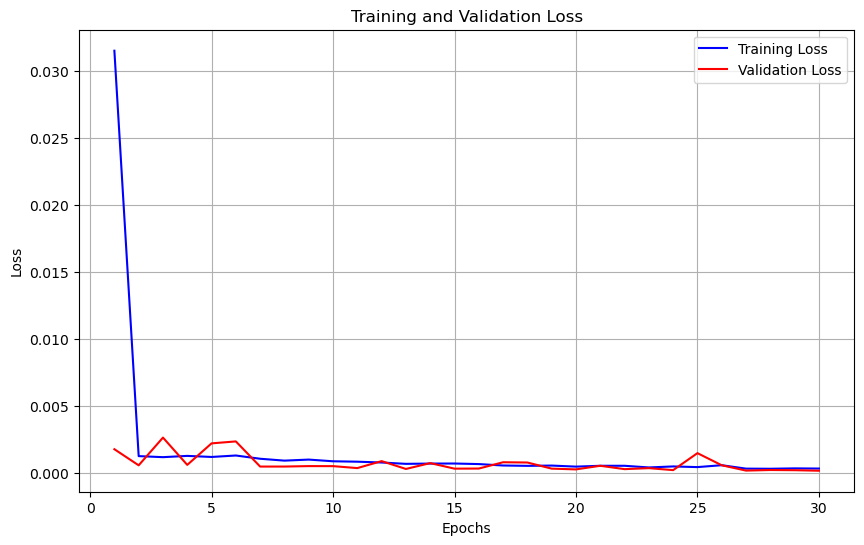

In [30]:
# Visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Evaluation
model.eval()
with torch.no_grad():
    test_loss = 0
    predictions = []
    actuals = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(targets.cpu().numpy())

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0001


In [32]:
# Convert predictions and actuals to numpy arrays
predictions = np.array(predictions)
actuals = np.array(actuals)

In [33]:
# Predictions
model.eval()
with torch.no_grad():
    predictions = []
    for inputs, _ in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy())

predictions = np.array(predictions)
print(predictions[:10])  # Menampilkan 10 prediksi pertama

[[0.6134893 ]
 [0.60656106]
 [0.5968148 ]
 [0.59796464]
 [0.59262127]
 [0.59405756]
 [0.5976479 ]
 [0.5942521 ]
 [0.5834621 ]
 [0.5752767 ]]


In [34]:
# Membuat DataFrame untuk perbandingan hasil prediksi dan nilai aktual
comparison_df = pd.DataFrame({
    'Predicted': predictions.flatten(),
    'Actual': actuals.flatten()
})

# Menampilkan DataFrame
print(comparison_df)

     Predicted    Actual
0     0.613489  0.600413
1     0.606561  0.590079
2     0.596815  0.593524
3     0.597965  0.586635
4     0.592621  0.590079
..         ...       ...
238   0.428141  0.423011
239   0.426983  0.410954
240   0.418065  0.414399
241   0.415298  0.404065
242   0.408725  0.410954

[243 rows x 2 columns]


In [35]:
# Menghitung metrik
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actuals, predictions)

# Menampilkan hasil
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

MSE: 0.0001
RMSE: 0.0118
MAPE: 1.7729%


In [36]:
# Membuat Data Frame
train_df = pd.DataFrame({
    'Tanggal': tanggal_train['Tanggal'],
    'Value': y_train.flatten(),
    'Type': 'Train'
})

test_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': y_test.flatten(),
    'Type': 'Test'
})

predicted_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': predictions.flatten(),
    'Type': 'Predicted'
})

In [37]:
compact_df = pd.concat([test_df, predicted_df])

In [38]:
# Menggabungkan DataFrame
combined_df = pd.concat([train_df, test_df, predicted_df])

# Menampilkan DataFrame
print(combined_df)

        Tanggal     Value       Type
10   2014-03-17  0.219428      Train
11   2014-03-18  0.226662      Train
12   2014-03-19  0.242508      Train
13   2014-03-20  0.228040      Train
14   2014-03-21  0.229418      Train
...         ...       ...        ...
2426 2024-02-26  0.428141  Predicted
2427 2024-02-27  0.426983  Predicted
2428 2024-02-28  0.418065  Predicted
2429 2024-02-29  0.415298  Predicted
2430 2024-03-01  0.408725  Predicted

[2664 rows x 3 columns]


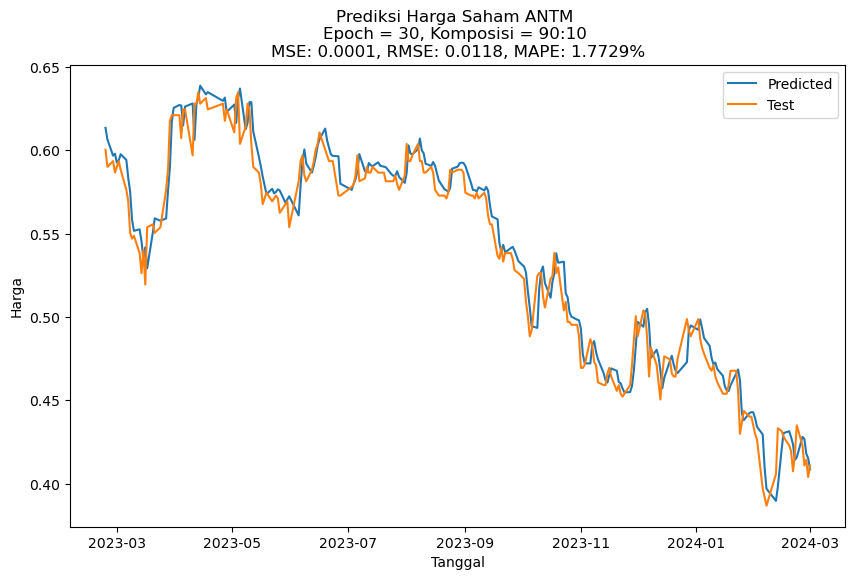

In [39]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in compact_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham ANTM \n' f"Epoch = {num_epochs}"', Komposisi = 90:10 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

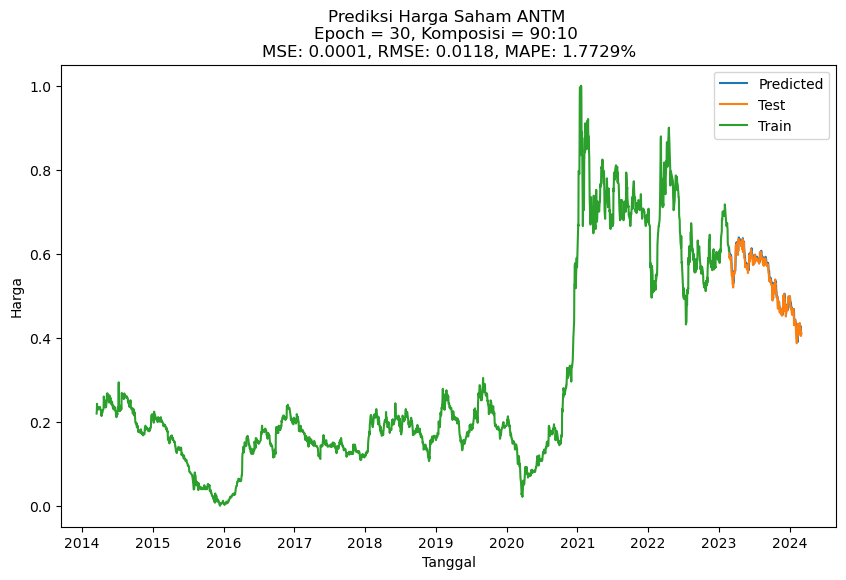

In [40]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in combined_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham ANTM \n' f"Epoch = {num_epochs}"', Komposisi = 90:10 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Prediksi 1 Bulan

In [42]:
#Import dataset

datapath_new = 'data/Data Historis ANTM 1 Bulan.csv'
dataset_new = pd.read_csv(datapath_new)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,07/06/2024,1300,1320,1350,1300,"77,51M","-1,14%"
1,06/06/2024,1315,1345,1380,1305,"73,53M","-1,87%"
2,05/06/2024,1340,1440,1445,1340,"111,83M","-6,94%"
3,04/06/2024,1440,1470,1485,1435,"60,29M","-2,04%"
4,03/06/2024,1470,1465,1490,1465,"29,62M","0,34%"
5,31/05/2024,1465,1490,1510,1465,"81,51M","-1,68%"
6,30/05/2024,1490,1525,1525,1490,"38,24M","-2,30%"
7,29/05/2024,1525,1525,1540,1505,"27,08M","0,66%"
8,28/05/2024,1515,1500,1535,1500,"33,68M","1,34%"
9,27/05/2024,1495,1525,1535,1490,"34,51M","-1,97%"


In [43]:
dataset_new['Tanggal'] = pd.to_datetime(dataset_new['Tanggal'],
                                   format = '%d/%m/%Y')
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-06-07,1300,1320,1350,1300,"77,51M","-1,14%"
1,2024-06-06,1315,1345,1380,1305,"73,53M","-1,87%"
2,2024-06-05,1340,1440,1445,1340,"111,83M","-6,94%"
3,2024-06-04,1440,1470,1485,1435,"60,29M","-2,04%"
4,2024-06-03,1470,1465,1490,1465,"29,62M","0,34%"
5,2024-05-31,1465,1490,1510,1465,"81,51M","-1,68%"
6,2024-05-30,1490,1525,1525,1490,"38,24M","-2,30%"
7,2024-05-29,1525,1525,1540,1505,"27,08M","0,66%"
8,2024-05-28,1515,1500,1535,1500,"33,68M","1,34%"
9,2024-05-27,1495,1525,1535,1490,"34,51M","-1,97%"


In [44]:
dataset_new = dataset_new.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,1810,1685,1810,1680,"201,07M","8,38%"
1,2024-04-17,1795,1815,1845,1775,"97,31M","-0,83%"
2,2024-04-18,1725,1800,1815,1710,"105,26M","-3,90%"
3,2024-04-19,1760,1765,1770,1725,"86,89M","2,03%"
4,2024-04-22,1770,1780,1800,1760,"70,46M","0,57%"
5,2024-04-23,1740,1770,1775,1730,"53,47M","-1,69%"
6,2024-04-24,1680,1745,1750,1680,"42,66M","-3,45%"
7,2024-04-25,1590,1680,1695,1585,"77,80M","-5,36%"
8,2024-04-26,1595,1600,1615,1575,"45,11M","0,31%"
9,2024-04-29,1615,1600,1620,1570,"44,76M","1,25%"


In [45]:
dataset_new = dataset_new.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,1810,1685,1810,1680,201.07M,8.38%
1,2024-04-17,1795,1815,1845,1775,97.31M,-0.83%
2,2024-04-18,1725,1800,1815,1710,105.26M,-3.90%
3,2024-04-19,1760,1765,1770,1725,86.89M,2.03%
4,2024-04-22,1770,1780,1800,1760,70.46M,0.57%
5,2024-04-23,1740,1770,1775,1730,53.47M,-1.69%
6,2024-04-24,1680,1745,1750,1680,42.66M,-3.45%
7,2024-04-25,1590,1680,1695,1585,77.80M,-5.36%
8,2024-04-26,1595,1600,1615,1575,45.11M,0.31%
9,2024-04-29,1615,1600,1620,1570,44.76M,1.25%


In [46]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset_new['Vol'] = dataset_new['Vol'].apply(replace_value)

dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,1810,1685,1810,1680,201070000.0,8.38%
1,2024-04-17,1795,1815,1845,1775,97310000.0,-0.83%
2,2024-04-18,1725,1800,1815,1710,105260000.0,-3.90%
3,2024-04-19,1760,1765,1770,1725,86890000.0,2.03%
4,2024-04-22,1770,1780,1800,1760,70460000.0,0.57%
5,2024-04-23,1740,1770,1775,1730,53470000.0,-1.69%
6,2024-04-24,1680,1745,1750,1680,42660000.0,-3.45%
7,2024-04-25,1590,1680,1695,1585,77800000.0,-5.36%
8,2024-04-26,1595,1600,1615,1575,45110000.0,0.31%
9,2024-04-29,1615,1600,1620,1570,44760000.0,1.25%


In [47]:
dataset_new = dataset_new.astype({'Terakhir': 'float32'})
dataset_new.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [48]:
dataset_new = dataset_new.astype({'Vol': 'float32'})
dataset_new.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

In [49]:
data_use_new = np.column_stack((dataset_new['Terakhir'], dataset_new['Vol']))
tanggal_data_new = pd.DataFrame({'Tanggal' : dataset_new['Tanggal']})

print(data_use_new)
print(tanggal_data_new)

[[1.8100e+03 2.0107e+08]
 [1.7950e+03 9.7310e+07]
 [1.7250e+03 1.0526e+08]
 [1.7600e+03 8.6890e+07]
 [1.7700e+03 7.0460e+07]
 [1.7400e+03 5.3470e+07]
 [1.6800e+03 4.2660e+07]
 [1.5900e+03 7.7800e+07]
 [1.5950e+03 4.5110e+07]
 [1.6150e+03 4.4760e+07]
 [1.6400e+03 4.2750e+07]
 [1.5100e+03 1.0092e+08]
 [1.4900e+03 7.0350e+07]
 [1.5150e+03 4.1690e+07]
 [1.5050e+03 4.0340e+07]
 [1.5350e+03 1.0911e+08]
 [1.5250e+03 3.6490e+07]
 [1.5250e+03 3.1680e+07]
 [1.5650e+03 5.1250e+07]
 [1.5650e+03 5.2890e+07]
 [1.6200e+03 8.8080e+07]
 [1.6550e+03 1.1354e+08]
 [1.5650e+03 5.9240e+07]
 [1.5250e+03 4.2180e+07]
 [1.4950e+03 3.4510e+07]
 [1.5150e+03 3.3680e+07]
 [1.5250e+03 2.7080e+07]
 [1.4900e+03 3.8240e+07]
 [1.4650e+03 8.1510e+07]
 [1.4700e+03 2.9620e+07]
 [1.4400e+03 6.0290e+07]
 [1.3400e+03 1.1183e+08]
 [1.3150e+03 7.3530e+07]
 [1.3000e+03 7.7510e+07]]
      Tanggal
0  2024-04-16
1  2024-04-17
2  2024-04-18
3  2024-04-19
4  2024-04-22
5  2024-04-23
6  2024-04-24
7  2024-04-25
8  2024-04-26
9  2024-0

In [50]:
scaled_data_new = scaler.fit_transform(data_use_new)

In [51]:
harga_new = scaled_data_new[:, 0]
volume_new = scaled_data_new[:, 1]
print(harga_new)
print(volume_new)

[1.         0.9705882  0.83333325 0.90196085 0.92156863 0.86274505
 0.7450981  0.56862736 0.57843137 0.61764693 0.66666675 0.41176462
 0.37254906 0.42156863 0.40196085 0.4607842  0.4411764  0.4411764
 0.5196078  0.5196078  0.62745094 0.6960783  0.5196078  0.4411764
 0.38235283 0.42156863 0.4411764  0.37254906 0.32352948 0.33333325
 0.27450967 0.07843137 0.02941179 0.        ]
[0.99999994 0.40364385 0.44933617 0.34375536 0.24932466 0.15167539
 0.08954538 0.291511   0.10362665 0.10161503 0.09006265 0.42439222
 0.24869247 0.08397035 0.07621127 0.47146386 0.05408357 0.02643831
 0.13891603 0.14834185 0.35059488 0.49692512 0.18483822 0.0867866
 0.04270361 0.03793322 0.         0.06414162 0.31283408 0.01459855
 0.19087304 0.48709697 0.26696938 0.28984427]


In [52]:
seq_length = 10  # Panjang urutan yang digunakan untuk pelatihan
predict_length = 20 # Prediksi 1 minggu ke depan (5 hari perdagangan)

x_new = []

for i in range(len(scaled_data_new) - seq_length):
    x_new.append(scaled_data_new[i:i + seq_length])

x_new = np.array(x_new)

# Convert to PyTorch tensors
x_new_tensor = torch.tensor(x_new, dtype=torch.float32)

In [53]:
model.eval()
with torch.no_grad():
    predictions_new = model(x_new_tensor)

# Konversi prediksi dari tensor ke numpy array
predictions_new = predictions_new.numpy()

In [54]:
# Ambil hanya kolom harga dari prediksi (kolom pertama)
predicted_prices_new = scaler.inverse_transform(
    np.concatenate([predictions_new, np.zeros((predictions_new.shape[0], 1))], axis=1)
)[:, 0]

In [55]:
df_new = pd.DataFrame(dataset_new, columns=['Tanggal', 'Terakhir', 'Vol'])
df_new

,Tanggal,Terakhir,Vol
0,2024-04-16,1810.0,201070000.0
1,2024-04-17,1795.0,97310000.0
2,2024-04-18,1725.0,105260000.0
3,2024-04-19,1760.0,86890000.0
4,2024-04-22,1770.0,70460000.0
5,2024-04-23,1740.0,53470000.0
6,2024-04-24,1680.0,42660000.0
7,2024-04-25,1590.0,77800000.0
8,2024-04-26,1595.0,45110000.0
9,2024-04-29,1615.0,44760000.0


In [56]:
# Buat DataFrame untuk prediksi dimulai dari tanggal 10
# Ambil tanggal terakhir dari data asli
last_date = pd.to_datetime(df_new['Tanggal'].iloc[-1])

# Tentukan tanggal mulai prediksi
start_date = last_date + pd.Timedelta(days=3)  # Dari tanggal 7 ke tanggal 10

# Buat range tanggal untuk prediksi
pred_dates = pd.date_range(start=start_date, periods=predict_length)

In [57]:
# Buat DataFrame untuk prediksi
pred_df = pd.DataFrame({'Tanggal': pred_dates, 'Harga_Terprediksi': predicted_prices_new[-predict_length:]})

# Gabungkan dengan DataFrame asli
result_df_new = pd.concat([df_new, pred_df[['Tanggal', 'Harga_Terprediksi']]], axis=0)

In [58]:
# Gabungkan dengan DataFrame asli
result_df_new = pd.concat([df_new, pred_df[['Tanggal', 'Harga_Terprediksi']]], axis=0)

print(result_df_new)

      Tanggal  Terakhir          Vol  Harga_Terprediksi
0  2024-04-16    1810.0  201070000.0                NaN
1  2024-04-17    1795.0   97310000.0                NaN
2  2024-04-18    1725.0  105260000.0                NaN
3  2024-04-19    1760.0   86890000.0                NaN
4  2024-04-22    1770.0   70460000.0                NaN
5  2024-04-23    1740.0   53470000.0                NaN
6  2024-04-24    1680.0   42660000.0                NaN
7  2024-04-25    1590.0   77800000.0                NaN
8  2024-04-26    1595.0   45110000.0                NaN
9  2024-04-29    1615.0   44760000.0                NaN
10 2024-04-30    1640.0   42750000.0                NaN
11 2024-05-02    1510.0  100920000.0                NaN
12 2024-05-03    1490.0   70350000.0                NaN
13 2024-05-06    1515.0   41690000.0                NaN
14 2024-05-07    1505.0   40340000.0                NaN
15 2024-05-08    1535.0  109110000.0                NaN
16 2024-05-13    1525.0   36490000.0            

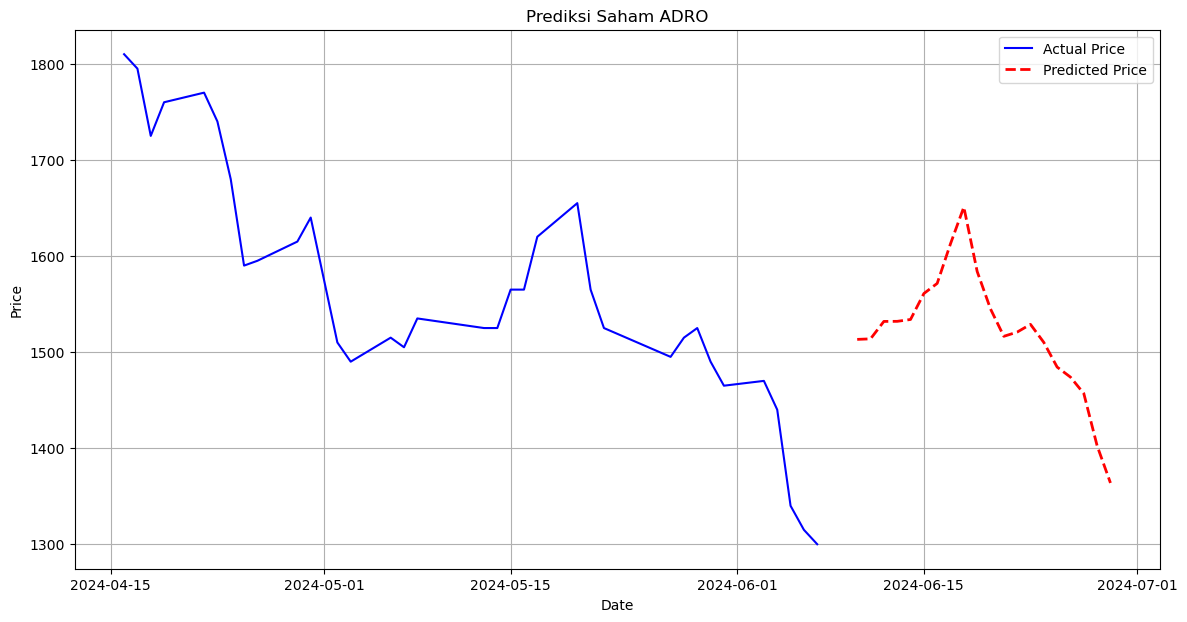

In [59]:
# Plotting
plt.figure(figsize=(14, 7))

# Plot data asli
plt.plot(result_df_new['Tanggal'][:len(df_new)], df_new['Terakhir'], label='Actual Price', color='blue')

# Plot data prediksi
plt.plot(pred_df['Tanggal'], pred_df['Harga_Terprediksi'], label='Predicted Price', color='red', linestyle='--', linewidth=2)

# Konfigurasi grafik
plt.title('Prediksi Saham ADRO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

In [60]:
result_df_new.to_csv('Harga Terprediksi ANTM.csv', index=False)